In [1]:
import owlready2 as owlr
import pandas as pd
from rdflib import URIRef, Literal, Graph
from rdflib.namespace import RDF, RDFS
from rdflib import Namespace
from rdflib.extras.external_graph_libs import rdflib_to_networkx_multidigraph

from collections import Counter
import uuid

from datetime import datetime, timezone

import io
import pydotplus
from IPython.display import display, Image
from rdflib.tools.rdf2dot import rdf2dot
from IPython.core.display import HTML

import loader

def visualize(g):
    stream = io.StringIO()
    rdf2dot(g, stream, opts = {display})
    dg = pydotplus.graph_from_dot_data(stream.getvalue())
    png = dg.create_png()

    display(Image(png))

def t2rdflibg(triples): #triples to rdflib graph
    g = Graph()
    for t in triples:
        g.add(t)
    return g

import networkx as nx



* Owlready2 * Warning: optimized Cython parser module 'owlready2_optimized' is not available, defaulting to slower Python implementation


In [2]:
retrieve_facts_sparql = """
SELECT ?s ?p ?o
WHERE 

{
    {
        ?r dm:FactPredicate ?p .
        ?r dm:FactSubject ?s .
        ?r dm:FactObject ?o .
    }
    
}
"""


data_load_objects_sparql = """
SELECT ?s ?p ?o
WHERE 

{
    {
        ?s a ?loadClasses .
        BIND (dm:MemberOf as ?m)
        BIND (dm:Contains as ?p)
        VALUES ?loadClasses { dm:JobNode dm:BatchNode}
        ?o ?m ?s .
    }
    UNION
    {
        ?s a ?loadClasses .
        BIND (dm:MemberOf as ?m)
        BIND (rdfs:label as ?p)
        VALUES ?loadClasses { dm:JobNode dm:BatchNode dm:RowNode}
        ?q ?m ?s .
        ?s ?p ?o .
    }
    
}
"""

retrieve_reconciliation_sparql = """
        SELECT distinct ?b ?j ?r ?f ?s ?p ?o ?sl ?ol
        
        WHERE
        
        {
        
            ?b a dm:BatchNode .
            ?b dm:Contains ?j .
            ?j dm:Contains ?r .
            ?r dm:Contains ?f .
            ?f dm:FactSubject ?s . 
            ?f dm:FactPredicate ?p .
            ?f dm:FactObject ?o.
            ?s dm:UniqueIdentifier ?sl .
            ?o dm:UniqueIdentifier ?ol .
            
            
            

        }


"""

In [3]:
onto = owlr.get_ontology("datamodels_rdf.owl").load()

* Owlready2 * WARNING: ObjectProperty http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#Contains belongs to more than one entity types: [owl.ObjectProperty, owl.ObjectProperty, owl.ObjectProperty, datamodels_rdf.MetaProperty]; I'm trying to fix it...
* Owlready2 * WARNING: ObjectProperty http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#MemberOf belongs to more than one entity types: [owl.ObjectProperty, owl.ObjectProperty, owl.ObjectProperty, datamodels_rdf.MetaProperty]; I'm trying to fix it...
* Owlready2 * WARNING: ObjectProperty http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#FromAttribute belongs to more than one entity types: [owl.ObjectProperty, datamodels_rdf.MetaClass, datamodels_rdf.RelationshipLinkage]; I'm trying to fix it...
* Owlready2 * WARNING: ObjectProperty http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#FromClass belongs to more than one entity types: [owl.ObjectProperty, datamodels_rdf.MetaClass, datamodels_rdf.Relationsh

In [4]:
def flush(onto):
    for m in onto.Serialization.instances()[0].Contains:
        print(m, m.is_a)
flush(onto)
owlr.sync_reasoner(onto)

* Owlready2 * Running HermiT...
    java -Xmx2000M -cp /usr/local/python/py36/lib/python3.6/site-packages/owlready2/hermit:/usr/local/python/py36/lib/python3.6/site-packages/owlready2/hermit/HermiT.jar org.semanticweb.HermiT.cli.CommandLine -c -O -D -I file:////var/folders/rd/q3bhk6_n56x75m05pp2sq7dr0000gn/T/tmp0dhz5v3b


datamodels_rdf.Mapping_Attribute [datamodels_rdf.Mapping]
datamodels_rdf.Mapping_AttributeHasDataType [datamodels_rdf.Mapping]
datamodels_rdf.Mapping_Class [datamodels_rdf.Mapping]
datamodels_rdf.Mapping_ClassContainsAttribute [datamodels_rdf.Mapping]
datamodels_rdf.Mapping_Context [datamodels_rdf.Mapping]
datamodels_rdf.Mapping_ContextContainsClass [datamodels_rdf.Mapping]
datamodels_rdf.Mapping_ContextContainsSubContext [datamodels_rdf.Mapping]
datamodels_rdf.Mapping_DomainContainsModel [datamodels_rdf.Mapping]
datamodels_rdf.Mapping_Model [datamodels_rdf.Mapping]
datamodels_rdf.Mapping_ModelContainsClass [datamodels_rdf.Mapping]
datamodels_rdf.Mapping_ModelContainsContext [datamodels_rdf.Mapping]
datamodels_rdf.Mapping_ModelDomain [datamodels_rdf.Mapping]
datamodels_rdf.Mapping_ModelHasModelType [datamodels_rdf.Mapping]
datamodels_rdf.Mapping_SubContext [datamodels_rdf.Mapping]


* Owlready2 * HermiT took 0.6504602432250977 seconds
* Owlready * Reparenting datamodels_rdf.FactPredicate: {owl.ObjectProperty, datamodels_rdf.Contains} => {datamodels_rdf.Contains}
* Owlready * Reparenting datamodels_rdf.FactObject: {owl.ObjectProperty, datamodels_rdf.Contains} => {datamodels_rdf.Contains}
* Owlready * Reparenting datamodels_rdf.FactSubject: {owl.ObjectProperty, datamodels_rdf.Contains} => {datamodels_rdf.Contains}
* Owlready * Reparenting datamodels_rdf.ToClass: {owl.ObjectProperty, datamodels_rdf.RelationshipLinkage} => {datamodels_rdf.RelationshipLinkage, datamodels_rdf.MetaClass}
* Owlready * Reparenting datamodels_rdf.ToAttribute: {owl.ObjectProperty, datamodels_rdf.RelationshipLinkage} => {datamodels_rdf.RelationshipLinkage, datamodels_rdf.MetaClass}
* Owlready * Reparenting datamodels_rdf.FromOptionality: {owl.ObjectProperty, datamodels_rdf.RelationshipLinkage} => {datamodels_rdf.RelationshipLinkage}
* Owlready * Reparenting datamodels_rdf.FromClass: {owl.Obje

In [5]:
serial_key = { "Business Domain" : "ModelDomain", 
             "Model" : "Model", 
             "ModelType" : "ModelType", 
             "Entity" : "Class", 
             "Attribute" : "Attribute", 
             "DataType" : "DataType", 
             "Context" : "Context", 
             "SubContext" : "SubContext"}



In [6]:
test = Graph()
test.parse ("datamodels_rdf.owl", format='xml')
dmns = Namespace(onto.base_iri)
test.bind('dm', dmns, override=True, replace=True)
test.bind('rdfs', RDFS)
namespace_d = {'dm': dmns, 'rdfs' : RDFS, 'rdf' : RDF}

def nan2None(value):
    if pd.isnull(value) :
        return None
    else:
        return value


def get_data_rows(filename):
    data_rows_df = pd.read_csv(filename)
    data_rows=[]
    for i,r in data_rows_df.iterrows():
        r_d = {k:nan2None(v) for k,v in dict(r).items()}

        data_rows.append(r_d)
    del data_rows_df
    return data_rows



In [7]:
batch_manifest = { onto.EntityAttributeRecord : get_data_rows("model_entities.csv")}

In [8]:
test = loader.load_data(onto, 
                        batch_manifest=batch_manifest, 
                        rdflib_graph=test, 
                        serial_key=serial_key)



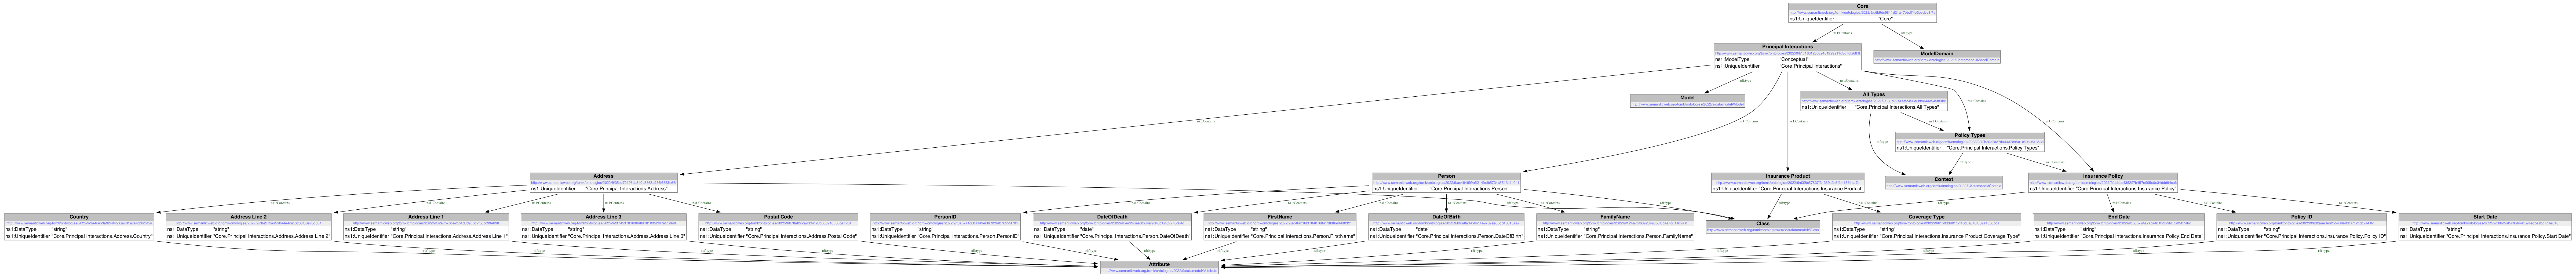

In [9]:
visualize(t2rdflibg(test.query(retrieve_facts_sparql)))

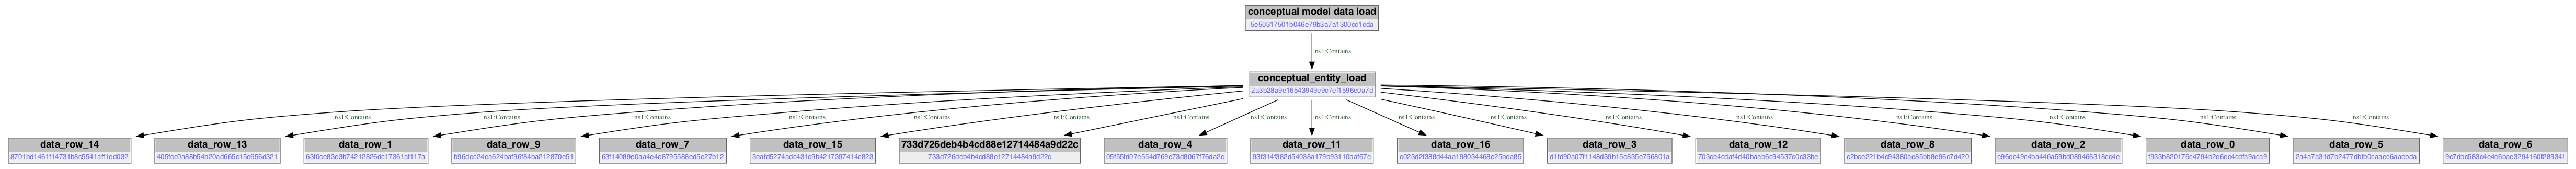

In [10]:
visualize(t2rdflibg(test.query(data_load_objects_sparql)))

In [11]:
batch_manifest = { onto.EntityAttributeRecord : get_data_rows("model_entities_v2.csv")}
test = loader.load_data(onto, batch_manifest=batch_manifest, rdflib_graph=test, serial_key=serial_key)

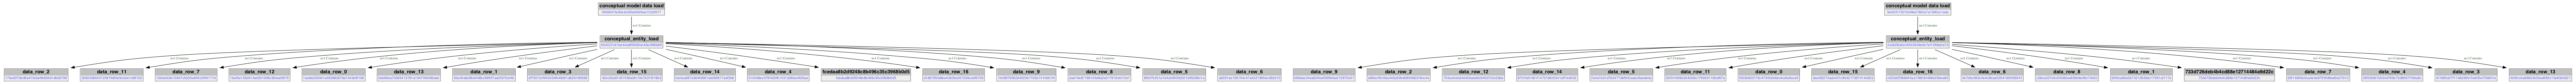

In [12]:
visualize(t2rdflibg(test.query(data_load_objects_sparql)))

In [13]:

#owlr.DeductiveClosure(onto).expand(row_g)
#visualize(t2rdflibg(row_g.query(q)))

df = pd.DataFrame(test.query(retrieve_reconciliation_sparql), columns=["b","j","r","f","s","p","o", "sl", "ol"])

df['key'] = df.apply(lambda x : str(x['sl']) + "." + str(x["p"]).split("#")[1] + "." + str(x['ol']), axis=1)
#df.sort_values(by="key")[["j", "r", "s","p","o"]].values

# Reconciling an arbitrarily complex object - Look for rows where the count != 2
# The things being reconciled here are facts/triples - so it's 100% coverage
rec_df = df.pivot_table(index="key", columns=["b"], aggfunc=len,margins=True)["f"].fillna(0).iloc[0:-1]
# If the older side has zero contents, and the newer side contains content, then it's an add.
# Conversely, a delete is signified.
# Processing this 
rec_df[rec_df['All']!=2]

b,5e50317501b046e79b3a7a1300cc1eda,f946901fa35a4a50be3b0baa152d5f17,All
key,,,
Core.Principal Interactions.Address.Contains.Core.Principal Interactions.Address.Address Line 3,1.0,0.0,1
Core.Principal Interactions.Address.Contains.Core.Principal Interactions.Address.Address Line Three,0.0,1.0,1


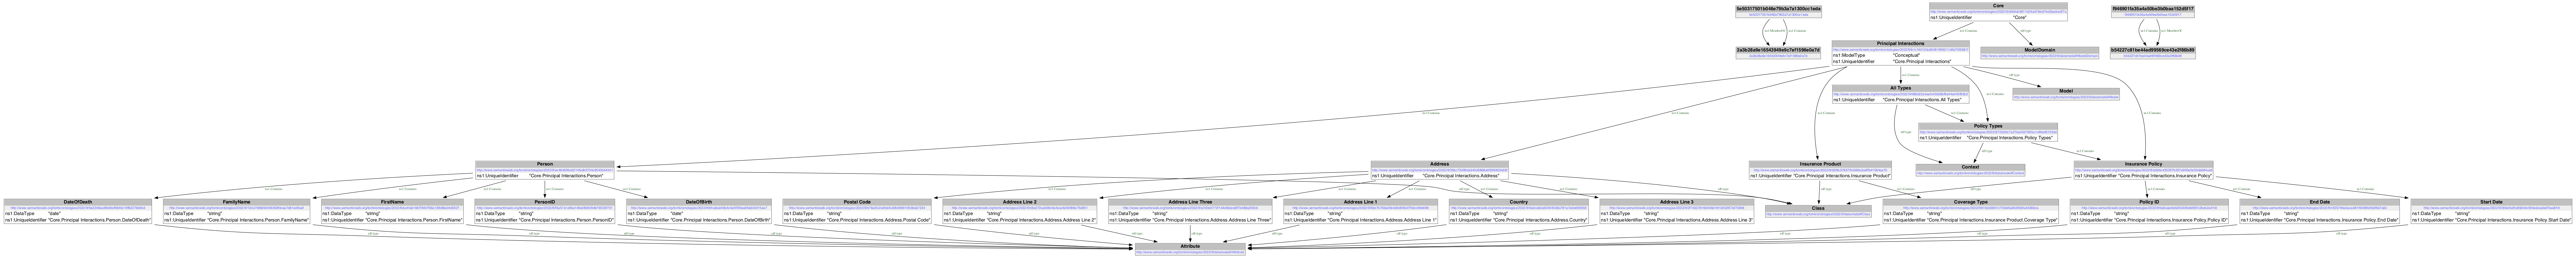

In [14]:
q = """
SELECT ?s ?p ?o
WHERE 

{
    {
        ?r dm:FactPredicate ?p .
        ?r dm:FactSubject ?s .
        ?r dm:FactObject ?o .
    }
    UNION
    {
        ?s a dm:BatchNode .
        ?s dm:Contains ?o .
        BIND (dm:Contains as ?p)
    }
    UNION
    {
        ?s a dm:BatchNode .
        BIND (dm:MemberOf as ?p)
        ?o ?p ?s .
    }
    
    
}
"""
#owlr.DeductiveClosure(onto).expand(row_g)
visualize(t2rdflibg(test.query(q)))


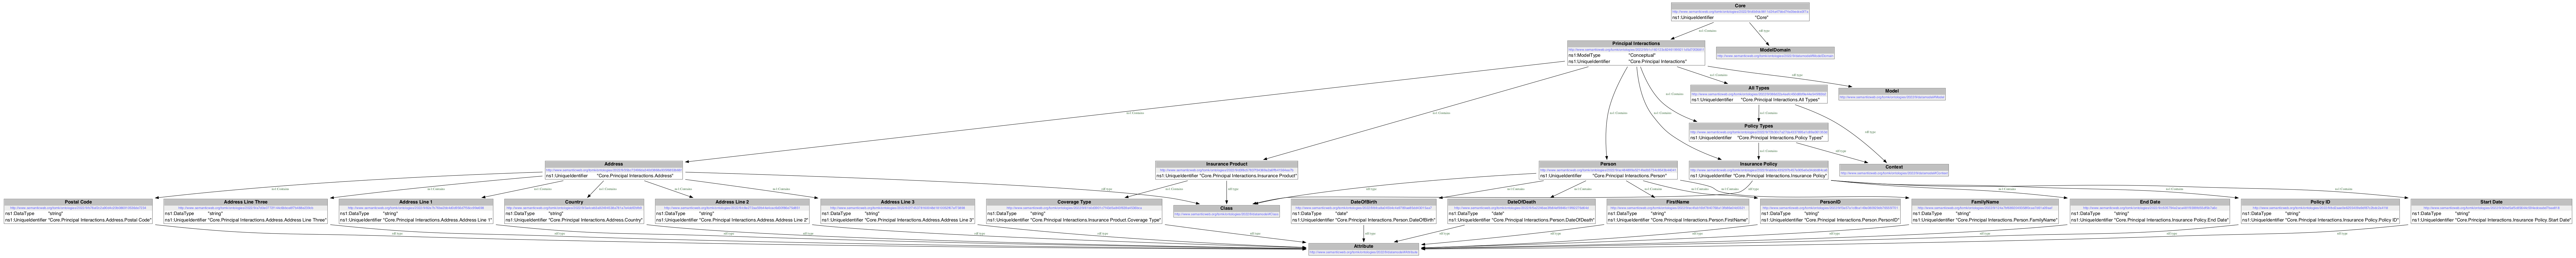

In [15]:
visualize(t2rdflibg(test.query(retrieve_facts_sparql)))

## To Do Next
### 23rd November 2022

1. Add additional attachment details at load time - things like load-names/tags
2. Find and/or create a more fleshed out data model to be serialized
3. Test data model relations. 
4. Confirm auditing/change identification for a 'diff' function
5. xxx